In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 111.4 MB/s eta 0:00:00m eta 0:00:010:0101

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 128.8 MB/s eta 0:00:00m eta 0:00:010:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.5/503.5 kB 110.0 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 40.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 142.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 147.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.1/944.1 kB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 14

Step 1:

Install and import the necessary libraries: pandas, sklearn and seaborn.

In [18]:
# Import labrary
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn import decomposition
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


Step 2:

Load the housing dataset and take a look at the first rows. Then create a new dataframe with only the 'latitude','longitude' and 'medincome' column to create our clusters.

In [3]:
# Read data
url='https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'
df_raw = pd.read_csv(url)

In [4]:
# Select columns

df_raw = df_raw[['Latitude', 'Longitude', 'MedInc']]

In [5]:
df = df_raw.copy()

Step 3:

Instantiate the kmeans algorithm. Then, create a new 'cluster' feature in your dataset and predict the cluster by fitting the 3 columns you have. You can view the k-means documentation to implement it: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html.

In [6]:
df.sample(5)

,Latitude,Longitude,MedInc
7409,33.96,-118.22,2.8000
3614,34.24,-118.41,3.1250
17026,37.51,-122.27,5.8964
11465,33.66,-118.00,3.2353
18191,37.37,-122.01,7.2165


In [7]:
scaler = StandardScaler()
df_scale = scaler.fit_transform(df)
df_scale

array([[ 1.05254828, -1.32783522,  2.34476576],
       [ 1.04318455, -1.32284391,  2.33223796],
       [ 1.03850269, -1.33282653,  1.7826994 ],
       ...,
       [ 1.77823747, -0.8237132 , -1.14259331],
       [ 1.77823747, -0.87362627, -1.05458292],
       [ 1.75014627, -0.83369581, -0.78012947]])

## Assess which is the optimar number of clusters:

* Elbow method
* Silhouette Method

### Elbow method

* Elbow method to select number of clusters
* Source: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f 
* For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples 
* to the nearest cluster centre

### Silhouette Method

* The silhouette method computes silhouette coefficients of each point that measure how much a point is similar to its own cluster compared to other clusters. by providing a succinct graphical representation of how well each object has been classified.

Elbow method

In [9]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    k_means = k_means.fit(df_scale)
    Sum_of_squared_distances.append(k_means.inertia_)

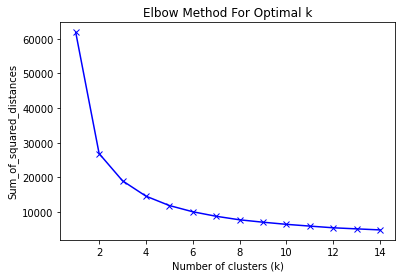

In [10]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Silhouette Method

In [11]:
rango_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
silhouette_avg = []
for num_clusters in rango_n_clusters:
# fit Kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_scale)
    cluster_labels = kmeans.labels_
# calcular silhouette
    silhouette_avg.append(silhouette_score(df_scale, cluster_labels))

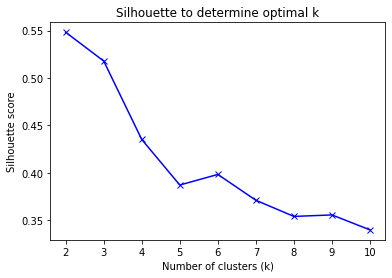

In [12]:
plt.plot(rango_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette to determine optimal k')
plt.show()

In [13]:
kmeans = KMeans(init="random",n_clusters=2, random_state=0, n_init=10,max_iter=300)

kmeans.fit(df_scale)

KMeans(init='random', n_clusters=2, random_state=0)

Step 4:

Convert your new 'cluster' column to 'category' type.

In [14]:
df_2 = scaler.inverse_transform(df_scale)

In [15]:
# Add column with number of cluster

df_2=pd.DataFrame(df_2,columns=['Latitude','Longitude','MedInc'])

df_2['Cluster'] = kmeans.labels_

df_2

,Latitude,Longitude,MedInc,Cluster
0,37.88,-122.23,8.3252,1
1,37.86,-122.22,8.3014,1
2,37.85,-122.24,7.2574,1
3,37.85,-122.25,5.6431,1
4,37.85,-122.25,3.8462,1
...,...,...,...,...
20635,39.48,-121.09,1.5603,1
20636,39.49,-121.21,2.5568,1
20637,39.43,-121.22,1.7000,1
20638,39.43,-121.32,1.8672,1


In [16]:
# Convert cluster to categorical 
df_2['Cluster'] = pd.Categorical(df_2.Cluster)

Step 5:

Use seaborn's relplot to visualize your new clusters.

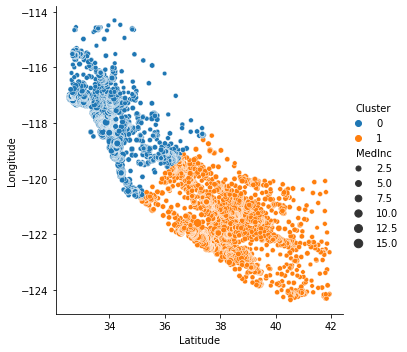

In [17]:
sns.relplot(x='Latitude', y='Longitude', data=df_2, kind='scatter', size = 'MedInc',hue='Cluster')
plt.show()

In [ ]:
pickle.dump(kmeans, open('../models/kmeans.pickle', 'wb')) # save the model
# modelo = pickle.load(open('../models/kmeans.pickle', 'rb')) # read the model in the future
# modelo.predict(X_test) # use it to predict with new data